# Cornerplots of various features for lensed system
### SDSS vs OM10 (realized by Galsim)

The OM10 mock lensed quasar catalog qso_mock.fits contains a list of LSST-like samples. Using the OM10 mock catalog and observation history data, we can generate a toy catalog for SLRealizer. Using the toy catalog, we can null-deblend the catalog and generate the cornerplot to easily compare different features. We use Galsim to null-deblend and realize the catalog. Then, we compared the OM10 features with SDSS features.

In [1]:
from __future__ import print_function
from astropy.table import Table, hstack
import astropy.io.fits as pyfits
import sys, os
import desc.slrealizer
import warnings
import numpy as np
warnings.filterwarnings("ignore")

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


The lines below enable the jupyter notebook to display inline plots.

In [2]:
import matplotlib
warnings.filterwarnings("ignore")
%matplotlib inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

Here, we initialize SLRealizer constructor

In [3]:
realizer = desc.slrealizer.SLRealizer()

## Features that we are using

In [4]:
# custom input
import pandas as pd
object_table = pd.read_csv('../data/object_catalog_galsim_noise.csv')
sdss_table = pd.read_csv('../data/sdss_object.csv')
option = ['custom']
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [5]:
true_lens = [1] * len(object_table)

In [6]:
df = object_table
eu  = df['u_e']
eg = df['g_e']
er = df['r_e']
ei = df['i_e']
ez = df['z_e']
euz = eu-ez
egz = eg-ez
erz = er-ez
eiz = ei-ez
esum = eu + eg + er + ei + ez
uy = df['u_y']
ux = df['u_x']
gy = df['g_y'] 
gx = df['g_x']
iy = df['i_y'] 
ix = df['i_x']
zy = df['z_y'] 
zx = df['z_x']
uyx = uy-ux
gyx = gy-gx
iyx = iy-ix
zyx = zy-zx
u = df['u_flux']
g = df['g_flux']
r = df['r_flux']
i = df['i_flux']
z = df['z_flux']
umag = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
zmag = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
rmag = desc.slrealizer.return_zeropoint()-2.5*np.log10(r)
imag = desc.slrealizer.return_zeropoint()-2.5*np.log10(i)
gmag = desc.slrealizer.return_zeropoint()-2.5*np.log10(g)
uz = umag-zmag
ui = umag-imag
zg = zmag-gmag
ug = umag-gmag
iz = imag-zmag
ri = rmag-imag
gr = gmag-rmag
truth = [1] * len(gr)
total_array = [truth, eu, eg, er, ei, ez, euz, egz, erz, eiz, esum, uy, ux, gy, gx, iy, ix, zy, zx, uyx, gyx, iyx, zyx
             , uz, ui, zg, ug, iz, ri, gr]
cols = np.array(total_array).transpose()
data = pd.DataFrame(cols)
data.to_csv('../data/truth_data.csv')

In [7]:
df = sdss_table
eu  = df['u_e']
eg = df['g_e']
er = df['r_e']
ei = df['i_e']
ez = df['z_e']
euz = eu-ez
egz = eg-ez
erz = er-ez
eiz = ei-ez
esum = eu + eg + er + ei + ez
uy = df['u_y']
ux = df['u_x']
gy = df['g_y'] 
gx = df['g_x']
iy = df['i_y'] 
ix = df['i_x']
zy = df['z_y'] 
zx = df['z_x']
uyx = uy-ux
gyx = gy-gx
iyx = iy-ix
zyx = zy-zx
u = df['u_flux']
g = df['g_flux']
r = df['r_flux']
i = df['i_flux']
z = df['z_flux']
umag = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
zmag = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
rmag = desc.slrealizer.return_zeropoint()-2.5*np.log10(r)
imag = desc.slrealizer.return_zeropoint()-2.5*np.log10(i)
gmag = desc.slrealizer.return_zeropoint()-2.5*np.log10(g)
uz = umag-zmag
ui = umag-imag
zg = zmag-gmag
ug = umag-gmag
iz = imag-zmag
ri = rmag-imag
gr = gmag-rmag
truth = [0] * len(gr)
total_array = [truth, eu, eg, er, ei, ez, euz, egz, erz, eiz, esum, uy, ux, gy, gx, iy, ix, zy, zx, uyx, gyx, iyx, zyx
             , uz, ui, zg, ug, iz, ri, gr]
cols = np.array(total_array).transpose()
data_sdss = pd.DataFrame(cols)
data_sdss.to_csv('../data/fake_data.csv')
print(data_sdss)

        0         1         2         3         4         5         6   \
0      0.0  0.061513  0.145989  0.066353  0.158610  0.326192 -0.264679   
1      0.0  0.358677  0.391018  0.218317  0.393866  0.685537 -0.326860   
2      0.0  0.565377  0.361704  0.330431  0.362582  0.286719  0.278658   
3      0.0  0.781020  0.295243  0.208666  0.388782  0.416403  0.364616   
4      0.0  0.999410  0.307449  0.062697  0.073934  0.501839  0.497571   
5      0.0  0.754165  0.098966  0.028306  0.090320  0.176186  0.577979   
6      0.0  0.593308  0.250706  0.226954  0.222513  0.563186  0.030122   
7      0.0  0.363795  0.357268  0.337127  0.297619  0.251902  0.111893   
8      0.0  0.259286  0.251775  0.123103  0.201844  0.336901 -0.077616   
9      0.0  0.656272  0.585520  0.554328  0.584581  0.647605  0.008667   
10     0.0  0.421755  0.480154  0.465965  0.519465  0.558530 -0.136775   
11     0.0  0.181905  0.388947  0.319260  0.226211  0.347233 -0.165328   
12     0.0  0.877236  0.143975  0.3632

In [8]:
df_col_merged =pd.concat([data, data_sdss], axis=0)
df_col_merged = df_col_merged.sample(frac=1)
print(df_col_merged)
df_col_merged.to_csv('../data/training_data.csv')

        0         1         2         3         4         5         6   \
672    0.0  0.307377  0.204303  0.089073  0.063629  0.269599  0.037778   
4167   0.0  0.275060  0.280457  0.418757  0.410065  0.400329 -0.125270   
171    0.0  0.641494  0.537243  0.492835  0.462616  0.456532  0.184962   
53578  0.0  0.377453  0.556192  0.546872  0.676805  0.778984 -0.401531   
25828  0.0  0.785628  0.633789  0.564759  0.549390  0.444656  0.340972   
36599  0.0  0.244788  0.208967  0.253345  0.275746  0.224619  0.020169   
18175  0.0  0.650425  0.187185  0.272209  0.325784  0.462187  0.188238   
25785  0.0  0.104388  0.195242  0.205529  0.129372  0.233546 -0.129157   
83352  0.0  0.655916  0.130430  0.106008  0.064856  0.384240  0.271675   
68170  0.0  0.536374  0.169041  0.338944  0.342774  0.335716  0.200658   
5042   0.0  0.764247  0.688564  0.500408  0.507588  0.569005  0.195242   
86723  0.0  0.635278  0.172965  0.210940  0.219812  0.162899  0.472379   
96389  0.0  0.787541  0.616327  0.4566

In [9]:
from sklearn import svm
import sklearn
import sklearn
print(sklearn.__version__)
from sklearn import model_selection

0.18.1


In [10]:
df_col_merged = df_col_merged.as_matrix()
y = df_col_merged[:,0]
last_col_index = len(df_col_merged[0])-1
X = df_col_merged[:,1: last_col_index]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
print(y_train)
print(y_test)

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]


LinearSVC

In [11]:
clf = svm.LinearSVC()

In [12]:
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [13]:
y_score = clf.predict(X_test)

31867 13 113 33


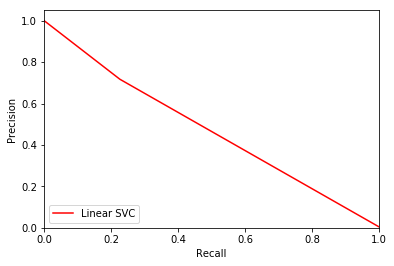

In [14]:
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_score = clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.plot(recall, precision, label='Linear SVC', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, y_score).ravel()
print(tn, fp, fn, tp)

In [15]:
#NearestNeighbors n=3

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [18]:
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
y_score = neigh.predict(X_test)

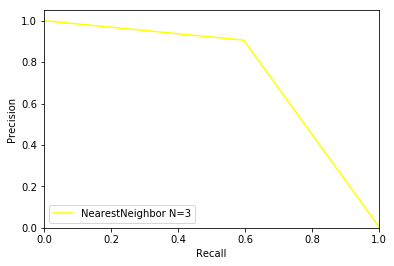

31871 9 59 87


In [20]:
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.plot(recall, precision, label='NearestNeighbor N=3', color='yellow')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.show()
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, y_score).ravel()
print(tn, fp, fn, tp)

In [21]:
#nearestneighbor n=10
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [22]:
y_score = neigh.predict(X_test)

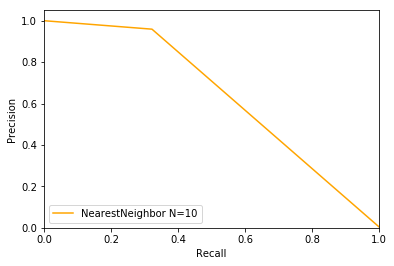

31878 2 99 47


In [23]:
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.plot(recall, precision, label='NearestNeighbor N=10', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.show()
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, y_score).ravel()
print(tn, fp, fn, tp)

In [24]:
# Random Forest N = 10
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_score = clf.predict(X_test)

104
146


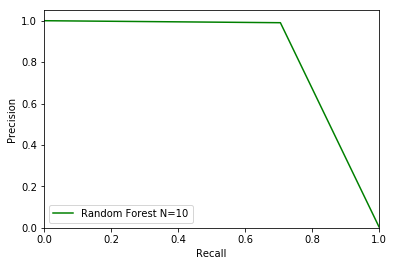

31879 1 43 103


In [25]:
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.clf()
plt.plot(recall, precision, label='Random Forest N=10', color='green')
print(np.count_nonzero(y_score))
print(np.count_nonzero(y_test))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.show()
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, y_score).ravel()
print(tn, fp, fn, tp)

In [26]:
# Random Forest N = 5
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5)
clf = clf.fit(X_train, y_train)
y_score = clf.predict(X_test)

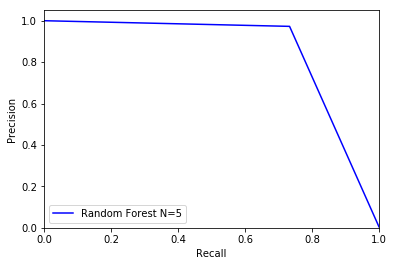

31877 3 39 107


In [27]:
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.clf()
plt.plot(recall, precision, label='Random Forest N=5', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.show()
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, y_score).ravel()
print(tn, fp, fn, tp)

In [28]:
# Random Forest N = 3
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=3)
clf = clf.fit(X_train, y_train)
y_score = clf.predict(X_test)
training_data = pd.read_csv('../data/training_data.csv')
sorted(zip(training_data.columns.values,clf.feature_importances_),key=lambda q: q[1],reverse=True)

[('14', 0.10111228755127051),
 ('16', 0.093699328843704591),
 ('12', 0.086278128842450619),
 ('25', 0.080972712681928141),
 ('10', 0.07907888174300369),
 ('Unnamed: 0', 0.068658835562865297),
 ('7', 0.062657688315396073),
 ('26', 0.057051576924679624),
 ('8', 0.05112290242862453),
 ('5', 0.040829978669683339),
 ('17', 0.031273083691795857),
 ('22', 0.028123179231765456),
 ('6', 0.024142146272349493),
 ('18', 0.020440878525281453),
 ('19', 0.019485381113398283),
 ('4', 0.01942638503459802),
 ('1', 0.01900491180957695),
 ('11', 0.017534756596093899),
 ('2', 0.016213986171910597),
 ('3', 0.014703534707776895),
 ('13', 0.013648291535017341),
 ('20', 0.013417995544088511),
 ('15', 0.012857574861207907),
 ('21', 0.0084679298238614174),
 ('23', 0.0072360376895529779),
 ('24', 0.0050379837123914082),
 ('9', 0.004757006598889512),
 ('0', 0.0027666155168376196)]

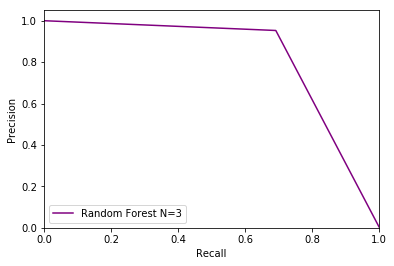

31875 5 45 101


In [29]:
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.clf()
plt.plot(recall, precision, label='Random Forest N=3', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.show()
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, y_score).ravel()
print(tn, fp, fn, tp)

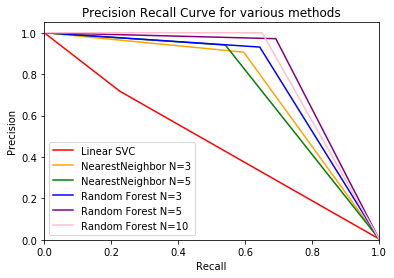

In [30]:
# linearsvc
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_score = clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.plot(recall, precision, label='Linear SVC', color='red')

# kneighbors n=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_score = neigh.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.plot(recall, precision, label='NearestNeighbor N=3', color='orange')

# kneighbors n=5
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train) 
y_score = neigh.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.plot(recall, precision, label='NearestNeighbor N=5', color='green')

# Random Forest N = 3
clf = RandomForestClassifier(n_estimators=3)
clf = clf.fit(X_train, y_train)
y_score = clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.plot(recall, precision, label='Random Forest N=3', color='blue')

# Random Forest N = 5
clf = RandomForestClassifier(n_estimators=5)
clf = clf.fit(X_train, y_train)
y_score = clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.plot(recall, precision, label='Random Forest N=5', color='purple')

# Random Forest N = 10
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_score = clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.plot(recall, precision, label='Random Forest N=10', color='pink')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.title('Precision Recall Curve for various methods')

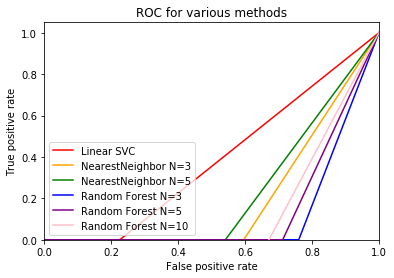

In [31]:
# linearsvc
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_score = clf.predict(X_test)
precision, recall, _ = sklearn.metrics.roc_curve(y_test, y_score)
plt.plot(recall, precision, label='Linear SVC', color='red')

# kneighbors n=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_score = neigh.predict(X_test)
precision, recall, _ = sklearn.metrics.roc_curve(y_test, y_score)
plt.plot(recall, precision, label='NearestNeighbor N=3', color='orange')

# kneighbors n=5
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train) 
y_score = neigh.predict(X_test)
precision, recall, _ = sklearn.metrics.roc_curve(y_test, y_score)
plt.plot(recall, precision, label='NearestNeighbor N=5', color='green')

# Random Forest N = 3
clf = RandomForestClassifier(n_estimators=3)
clf = clf.fit(X_train, y_train)
y_score = clf.predict(X_test)
precision, recall, _ = sklearn.metrics.roc_curve(y_test, y_score)
plt.plot(recall, precision, label='Random Forest N=3', color='blue')

# Random Forest N = 5
clf = RandomForestClassifier(n_estimators=5)
clf = clf.fit(X_train, y_train)
y_score = clf.predict(X_test)
precision, recall, _ = sklearn.metrics.roc_curve(y_test, y_score)
plt.plot(recall, precision, label='Random Forest N=5', color='purple')

# Random Forest N = 10
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_score = clf.predict(X_test)
precision, recall, _ = sklearn.metrics.roc_curve(y_test, y_score)
plt.plot(recall, precision, label='Random Forest N=10', color='pink')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.title('ROC for various methods')